# Housing Price Prediction

- ## Problem Statement 

 A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

  The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
     
   The company wants to know:

   - Which variables are significant in predicting the price of a house, and

   - How well those variables describe the price of a house.

  Also, determine the optimal value of lambda for ridge and lasso regression.

- ### Business Goal 

   You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### 1. Reading and understanding the data

In [1]:
#Importing relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#reading the dataset 
housingdata = pd.read_csv('train.csv', encoding = 'latin')

In [3]:
# Looking at sample data 
housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Analysing the datatypes 
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Checking number of rows and columns 
housingdata.shape

(1460, 81)

In [6]:
#Checking for null columns
housingdata.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [7]:
#Describing the data
housingdata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 2. Data Cleaning 

In [8]:
#Checking null values
housingdata.select_dtypes(include='object').isnull().sum()[housingdata.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

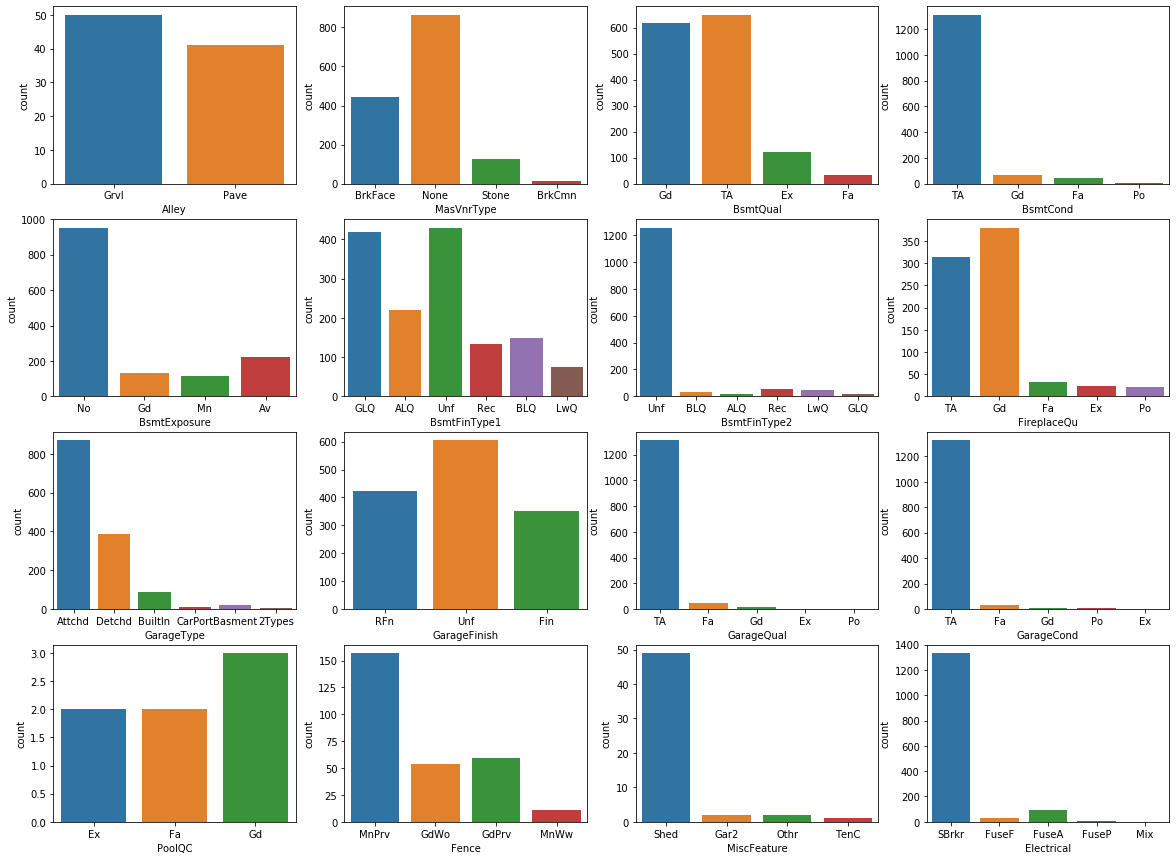

In [9]:
#Checking the categorical variables values and counts
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.countplot(x="Alley", data=housingdata);
plt.subplot(4,4,2)
sns.countplot(x="MasVnrType", data=housingdata);
plt.subplot(4,4,3)
sns.countplot(x="BsmtQual", data=housingdata);
plt.subplot(4,4,4)
sns.countplot(x="BsmtCond", data=housingdata);
plt.subplot(4,4,5)
sns.countplot(x="BsmtExposure", data=housingdata);
plt.subplot(4,4,6)
sns.countplot(x="BsmtFinType1", data=housingdata);
plt.subplot(4,4,7)
sns.countplot(x="BsmtFinType2", data=housingdata);
plt.subplot(4,4,8)
sns.countplot(x="FireplaceQu", data=housingdata);
plt.subplot(4,4,9)
sns.countplot(x="GarageType", data=housingdata);
plt.subplot(4,4,10)
sns.countplot(x="GarageFinish", data=housingdata);
plt.subplot(4,4,11)
sns.countplot(x="GarageQual", data=housingdata);
plt.subplot(4,4,12)
sns.countplot(x="GarageCond", data=housingdata);
plt.subplot(4,4,13)
sns.countplot(x="PoolQC", data=housingdata);
plt.subplot(4,4,14)
sns.countplot(x="Fence", data=housingdata);
plt.subplot(4,4,15)
sns.countplot(x="MiscFeature", data=housingdata);
plt.subplot(4,4,16)
sns.countplot(x="Electrical", data=housingdata);
plt.show()

In [10]:
# Replace NA with None in the columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housingdata[col]=housingdata[col].fillna('None')

##### Removing categorical variables that have more than 85% data associated to one value


In [11]:
# Drop the following columns that have more than 85% values associated to a specific value
# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housingdata.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housingdata[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

housingdata.drop(columnsToBeRemoved, axis = 1, inplace = True)


In [12]:
# checking for null values in all categorical columns

housingdata.select_dtypes(include='object').isnull().sum()[housingdata.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

There are no null values in categorical variables

#### Removing null values in Numerical attributes

In [13]:
# checking null values in the numerical data

housingdata.select_dtypes(include=['int64','float']).isnull().sum()[housingdata.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [14]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

housingdata['LotFrontage'] = housingdata['LotFrontage'].replace(np.nan, housingdata['LotFrontage'].median())
housingdata['MasVnrArea'] = housingdata['MasVnrArea'].replace(np.nan, housingdata['MasVnrArea'].median())

In [15]:
# Setting the null values with 0 for GarageYrBlt 

housingdata['GarageYrBlt']=housingdata['GarageYrBlt'].fillna(0)
housingdata['GarageYrBlt'] = housingdata['GarageYrBlt'].astype(int)

In [16]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housingdata['IsRemodelled'] = housingdata.apply(checkForRemodel, axis=1)
housingdata['IsRemodelled'].value_counts()

0    764
1    696
Name: IsRemodelled, dtype: int64

In [17]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housingdata['BuiltOrRemodelAge'] = housingdata.apply(getBuiltOrRemodelAge, axis=1)
housingdata['BuiltOrRemodelAge'].head()

0     5
1    31
2     6
3    36
4     8
Name: BuiltOrRemodelAge, dtype: int64

In [18]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housingdata['OldOrNewGarage'] = housingdata['GarageYrBlt'].apply(getGarageConstructionPeriod)
housingdata['OldOrNewGarage'].value_counts()

0    1058
1     402
Name: OldOrNewGarage, dtype: int64

In [19]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

housingdata.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

#### Remove numerical attributes that have more than 85% data associated to one value

In [20]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housingdata.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housingdata[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housingdata.drop(columnsToBeRemoved, axis = 1, inplace = True)

housingdata.drop(['MoSold'], axis = 1, inplace = True)

housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [21]:
# check for percentage of null values in each column

percent_missing = round(100*(housingdata.isnull().sum()/len(housingdata.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


In [22]:
# Check if there are any duplicate values in the dataset

housingdata[housingdata.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


#### Outlier Treatment

In [23]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housingdata.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


`There is remarkable difference in mean and 50% values for columns : LotArea,MasVnrArea,TotalBsmtSF,WoodDeckSF,OpenPorchSF. So checking the outliers in these columns`

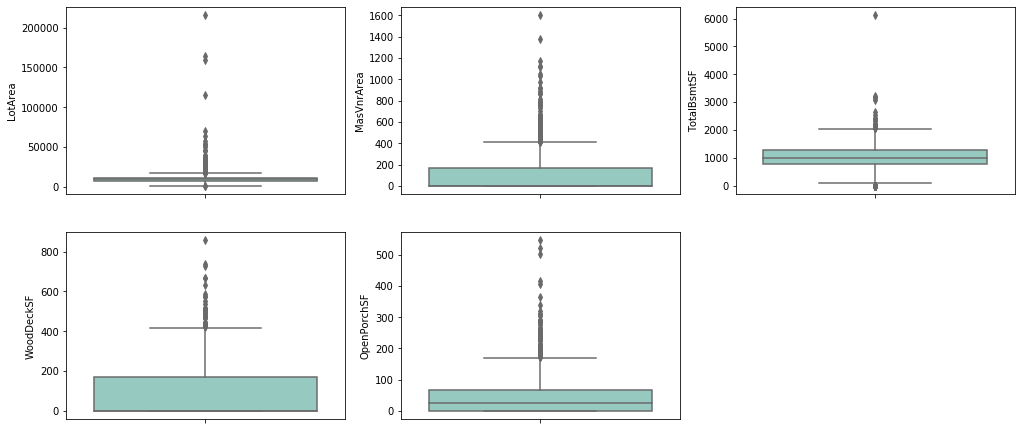

In [24]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housingdata)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housingdata)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housingdata)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housingdata)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housingdata)
plt.show()

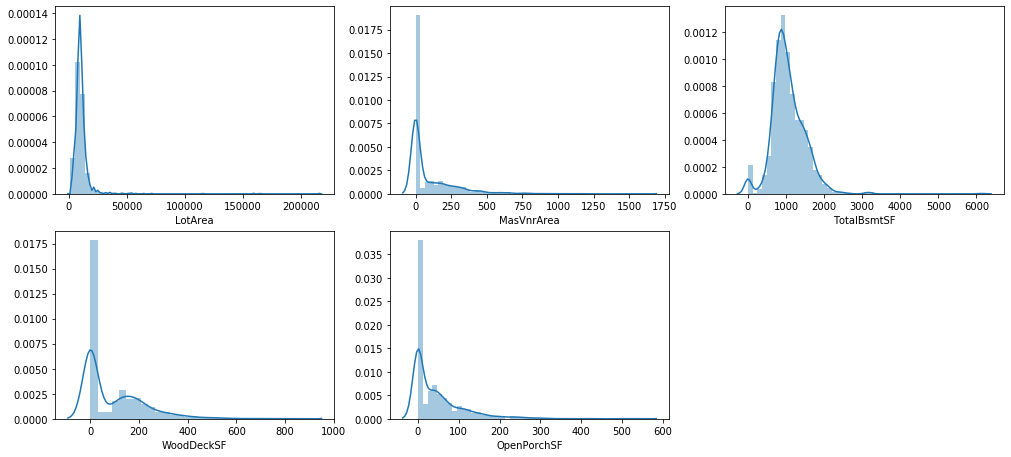

In [25]:
# Check the outliers in all the numeric columns
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(housingdata['LotArea'])
plt.subplot(5,3,2)
sns.distplot(housingdata['MasVnrArea'])
plt.subplot(5,3,3)
sns.distplot(housingdata['TotalBsmtSF'])
plt.subplot(5,3,4)
sns.distplot(housingdata['WoodDeckSF'])
plt.subplot(5,3,5)
sns.distplot(housingdata[ 'OpenPorchSF'])
plt.show()

In [26]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housingdata['LotArea'].quantile(0.98)
housingdata = housingdata[housingdata["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housingdata['MasVnrArea'].quantile(0.98)
housingdata = housingdata[housingdata["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housingdata['TotalBsmtSF'].quantile(0.99)
housingdata = housingdata[housingdata["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housingdata['WoodDeckSF'].quantile(0.99)
housingdata = housingdata[housingdata["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housingdata['OpenPorchSF'].quantile(0.99)
housingdata = housingdata[housingdata["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [27]:
# Determine the percentage of data retained

num_data = round(100*(len(housingdata)/1460),2)
print(num_data)

93.01


### 3: Data Visualization

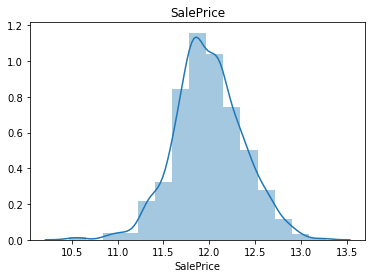

In [28]:
# target variable 'SalePrice' after transforming the sales price to log scale 

housingdata['SalePrice'] = np.log1p(housingdata['SalePrice'])

plt.title('SalePrice')
sns.distplot(housingdata['SalePrice'], bins=15)
plt.show()

###### The target variable - sales price is normally distributed with some noise 

<Figure size 720x360 with 0 Axes>

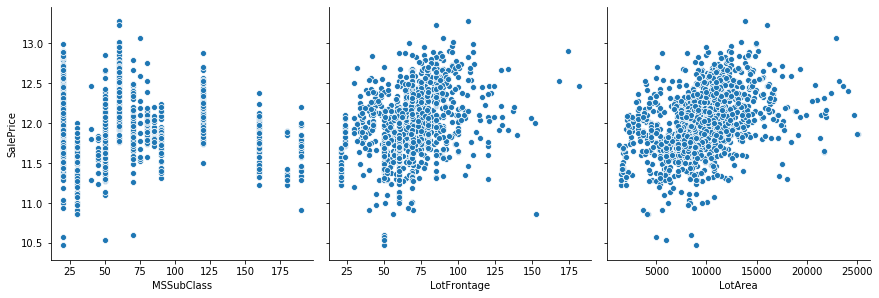

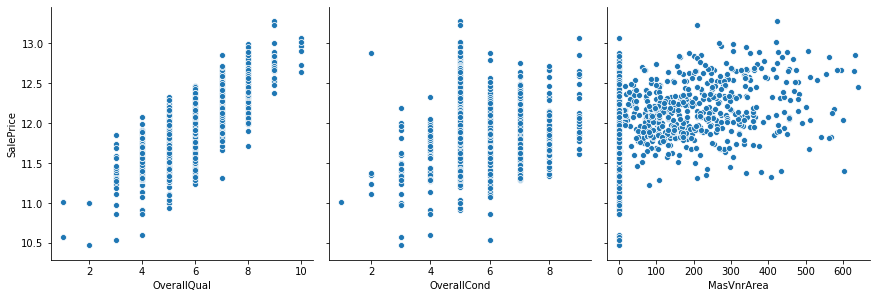

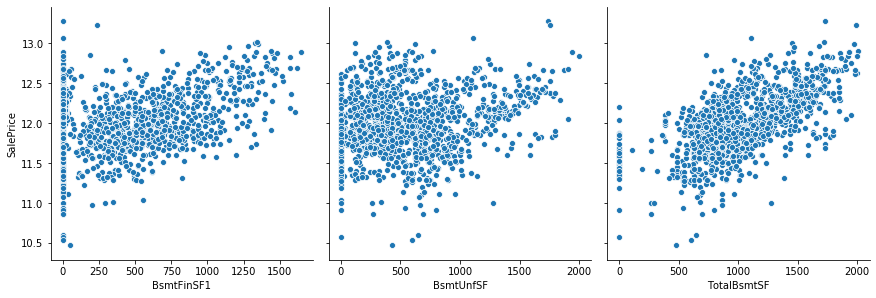

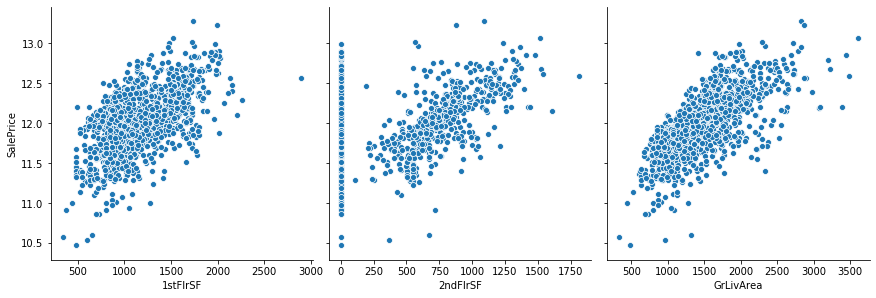

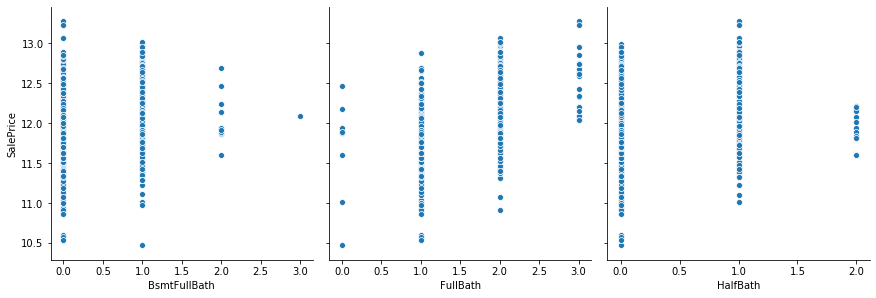

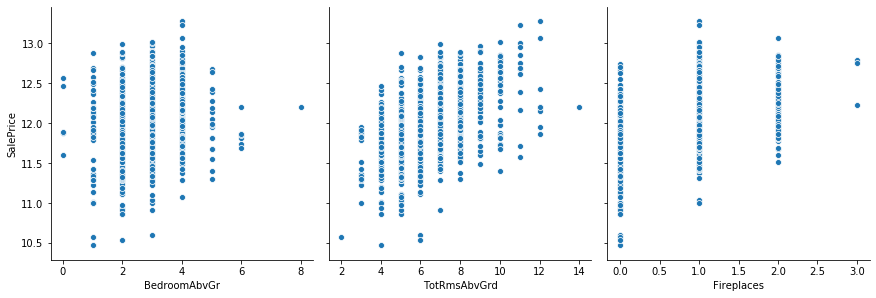

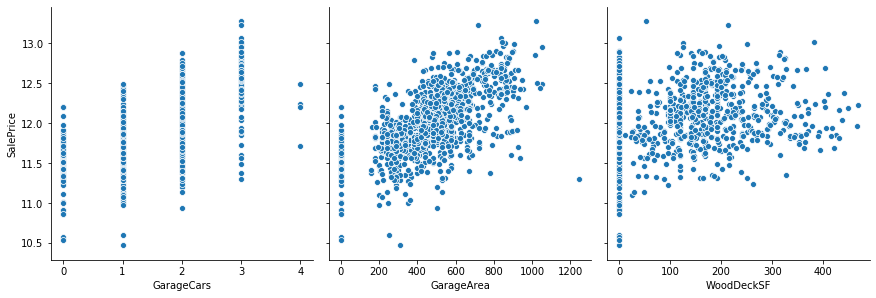

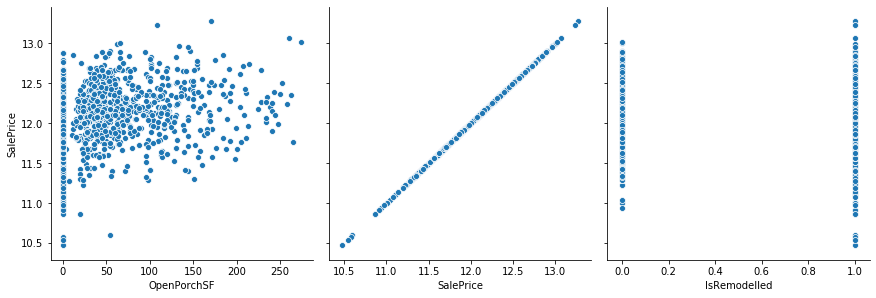

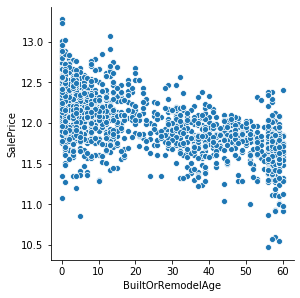

In [29]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housingdata, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingdata, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingdata, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingdata, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingdata, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingdata, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingdata, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingdata, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingdata, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

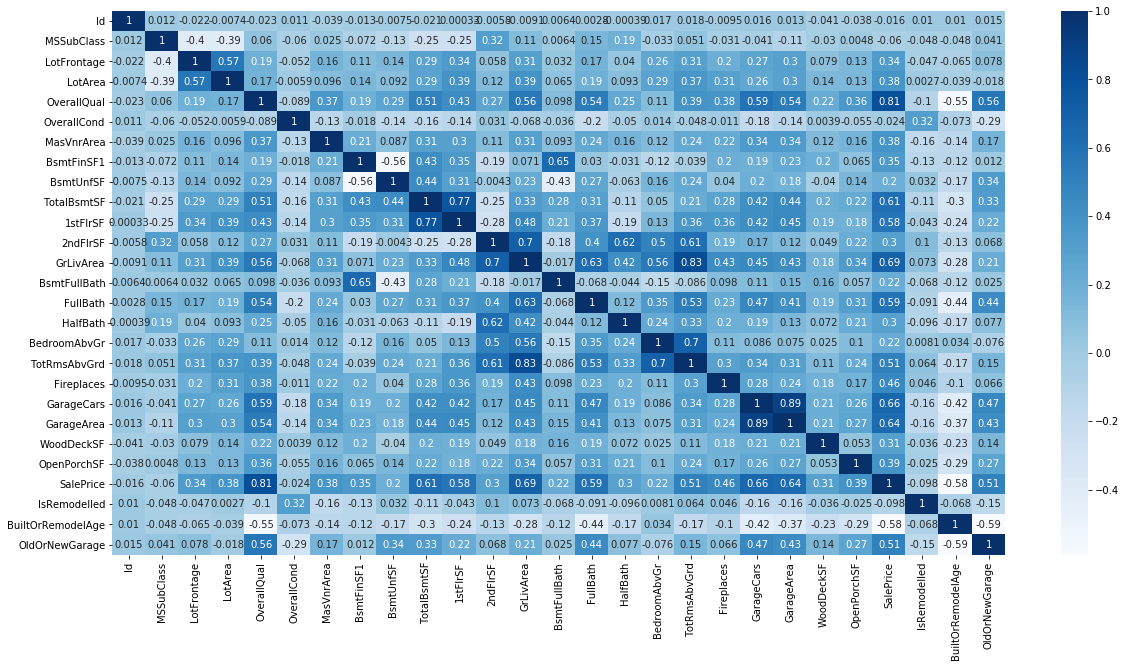

In [30]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housingdata.corr(), annot = True, cmap="Blues")
plt.show()

#### Removing highly co-related variables to avoid multicolinearity 
- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%

In [31]:
# Removing the highly correlated variables

housingdata.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [32]:
# Check the shape of the dataframe

housingdata.shape

(1358, 47)

#### Step 4: Data Preparation

Let's assigne ordered sequence value for ordered variables and for non ordered categorize them into  0 and 1

In [33]:
housingdata['d_ExterQual'] = housingdata['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housingdata['d_ExterQual'].value_counts()

3    864
4    448
5     32
2     14
Name: d_ExterQual, dtype: int64

In [34]:
housingdata['d_BsmtQual'] = housingdata['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingdata['d_BsmtQual'].value_counts()

3    617
4    575
5     94
0     37
2     35
Name: d_BsmtQual, dtype: int64

In [35]:
housingdata['d_BsmtExposure'] = housingdata['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housingdata['d_BsmtExposure'].value_counts()

1    906
3    208
2    104
4    102
0     38
Name: d_BsmtExposure, dtype: int64

In [36]:
housingdata['d_BsmtFinType1'] = housingdata['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housingdata['d_BsmtFinType1'].value_counts()

1    410
6    377
5    202
4    140
3    123
2     69
0     37
Name: d_BsmtFinType1, dtype: int64

In [37]:
housingdata['d_HeatingQC'] = housingdata['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingdata['d_HeatingQC'].value_counts()

5    681
3    403
4    228
2     45
1      1
Name: d_HeatingQC, dtype: int64

In [38]:
housingdata['d_KitchenQual'] = housingdata['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingdata['d_KitchenQual'].value_counts()

3    696
4    547
5     76
2     39
Name: d_KitchenQual, dtype: int64

In [39]:
housingdata['d_FireplaceQu'] = housingdata['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingdata['d_FireplaceQu'] .value_counts()

0    672
4    337
3    284
2     31
1     19
5     15
Name: d_FireplaceQu, dtype: int64

In [40]:
housingdata['d_GarageFinish'] = housingdata['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housingdata['d_GarageFinish'].value_counts()

1    581
2    397
3    301
0     79
Name: d_GarageFinish, dtype: int64

In [41]:
housingdata['d_BldgType'] = housingdata['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housingdata['d_BldgType'].value_counts()

1    1129
4     107
3      52
5      43
2      27
Name: d_BldgType, dtype: int64

In [42]:
housingdata['d_HouseStyle'] = housingdata['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housingdata['d_HouseStyle'].value_counts()

1    673
4    406
3    149
8     63
7     37
2     14
6      8
5      8
Name: d_HouseStyle, dtype: int64

In [43]:
housingdata['d_Fence'] = housingdata['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housingdata['d_Fence'].value_counts()

0    1093
2     152
4      52
3      51
1      10
Name: d_Fence, dtype: int64

In [44]:
housingdata['d_LotConfig'] = housingdata['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housingdata['d_LotConfig'].value_counts()

5    988
4    244
3     78
2     44
1      4
Name: d_LotConfig, dtype: int64

In [45]:
housingdata['d_MasVnrType'] = housingdata['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housingdata['d_MasVnrType'].value_counts()                                                            

0    828
1    530
Name: d_MasVnrType, dtype: int64

In [46]:
housingdata['d_SaleCondition'] = housingdata['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housingdata['d_SaleCondition'].value_counts()

1    1229
0     129
Name: d_SaleCondition, dtype: int64

In [47]:
housingdata['d_LotShape'] = housingdata['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housingdata['d_LotShape'] .value_counts()

3    880
2    441
1     29
0      8
Name: d_LotShape, dtype: int64

In [48]:
# drop the old columns from which the new columns were derived also We can also drop the id column as it will not be used any more

housingdata = housingdata.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

In [49]:
housingdata.shape

(1358, 46)

#### create dummies for columns - MSZoning,Neighborhood ,RoofStyle, Exterior1st, Exterior2nd, Foundation, GarageType

In [50]:
#Crearing the dummy variables
d_MSZoning = pd.get_dummies(housingdata['MSZoning'], prefix='MSZoning', drop_first = True)
housingdata = pd.concat([housingdata, d_MSZoning], axis = 1)

d_Neighborhood = pd.get_dummies(housingdata['Neighborhood'], prefix='Neighborhood', drop_first = True)
housingdata = pd.concat([housingdata, d_Neighborhood], axis = 1)

d_RoofStyle = pd.get_dummies(housingdata['RoofStyle'], prefix='RoofStyle', drop_first = True)
housingdata = pd.concat([housingdata, d_RoofStyle], axis = 1)

d_Exterior1st = pd.get_dummies(housingdata['Exterior1st'], prefix='Exterior1st', drop_first = True)
housingdata = pd.concat([housingdata, d_Exterior1st], axis = 1)

d_Exterior2nd = pd.get_dummies(housingdata['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housingdata = pd.concat([housingdata, d_Exterior2nd], axis = 1)

d_Foundation = pd.get_dummies(housingdata['Foundation'], prefix='Foundation', drop_first = True)
housingdata = pd.concat([housingdata, d_Foundation], axis = 1)

d_GarageType = pd.get_dummies(housingdata['GarageType'], prefix='GarageType', drop_first = True)
housingdata = pd.concat([housingdata, d_GarageType], axis = 1)
housingdata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [51]:
# drop the below columns as we now have new columns derived from these columns

housingdata = housingdata.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

In [52]:
housingdata.shape

(1358, 112)

In [53]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


## 5: Train Test Split

In [54]:
# Putting all feature variable( except target variable - salesPrice ) to X

X = housingdata.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [55]:
# Putting target variable to y

y = housingdata['SalePrice']

#### Scaling the features
It is very important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become issue at the time of model evaluation, so it is recommonded to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

In [56]:
# storing column names in cols

cols = X.columns

# scaling (the dataframe is converted to a numpy array)

X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [57]:
# splitting the data into train and test set 

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

## 6: Recursive feature elimination (RFE)

In [58]:
# Executing RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [59]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,TotalBsmtSF,True,1
6,GrLivArea,True,1
7,BsmtFullBath,True,1
8,FullBath,True,1
9,HalfBath,True,1


In [60]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [61]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## 7: Model Building and Evaluation

##### L2 (Ridge) Regularisation

<b>In sklearn.linear_model.LogisticRegression, C actually refers to the inverse regularization strength, 𝟏/λ 
- Interpretation: 
- C is high, lambda is low, less regularisation. Model is complex and will overfit
- C is low, lambda is high, high regularisation. Model is simple and will underfit</b>

In [62]:

C_values = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = C_values, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [63]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
22,20,-0.078190,-0.084319,1
21,10,-0.077995,-0.084363,2
20,9,-0.077972,-0.084369,3
19,8,-0.077946,-0.084375,4
18,7,-0.077918,-0.084380,5
23,50,-0.078666,-0.084390,6
17,6,-0.077893,-0.084411,7
16,5,-0.077877,-0.084461,8
15,4,-0.077866,-0.084545,9
14,3,-0.077856,-0.084644,10


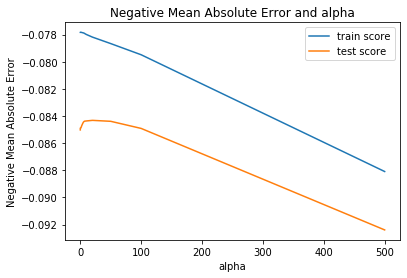

In [64]:

# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [65]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [66]:

# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.00677601,  0.02000651,  0.07232674,  0.04784446,  0.03323843,
        0.04887751,  0.10424708,  0.01321761,  0.01162567,  0.01888043,
        0.02222517,  0.03697877,  0.00980315, -0.01346059, -0.02274418,
        0.01589373,  0.01386172,  0.01703235,  0.01824339,  0.0148198 ,
       -0.01315042,  0.01331545,  0.05944089,  0.0221277 ,  0.09010801,
        0.059445  ,  0.02524397, -0.01077158, -0.00530605,  0.02391505,
       -0.01260239, -0.01142445,  0.01805455, -0.00896465,  0.01160925,
       -0.00301668,  0.01411352,  0.01122454,  0.01835503, -0.01048211,
        0.01124226, -0.00843619, -0.01884433,  0.01524888, -0.01290691,
        0.02131876,  0.04678513,  0.02001153,  0.00656776, -0.01004351])

In [67]:
#Calculating the Root Mean Squared Error for test
print('RMSE :', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

RMSE : 0.11727666074870007


In [68]:
# Check the mean squared error : test

mean_squared_error(y_test, ridge.predict(X_test))


0.013753815156365687

In [69]:
# Check the mean squared error : train
mean_squared_error(y_train, ridge.predict(X_train))

0.011517617118075252

In [70]:
#calculating r2_score for test
r2_score(y_test,ridge.predict(X_test))

0.9011390799995597

In [71]:
#calculating r2_score for train
r2_score(y_train,ridge.predict(X_train))

0.9181379766786519

In [72]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0068
1,LotArea,0.0200
2,OverallQual,0.0723
3,OverallCond,0.0478
4,BsmtFinSF1,0.0332
5,TotalBsmtSF,0.0489
6,GrLivArea,0.1042
7,BsmtFullBath,0.0132
8,FullBath,0.0116
9,HalfBath,0.0189


In [73]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0068,
 'LotArea': 0.02,
 'OverallQual': 0.0723,
 'OverallCond': 0.0478,
 'BsmtFinSF1': 0.0332,
 'TotalBsmtSF': 0.0489,
 'GrLivArea': 0.1042,
 'BsmtFullBath': 0.0132,
 'FullBath': 0.0116,
 'HalfBath': 0.0189,
 'Fireplaces': 0.0222,
 'GarageCars': 0.037,
 'WoodDeckSF': 0.0098,
 'IsRemodelled': -0.0135,
 'BuiltOrRemodelAge': -0.0227,
 'OldOrNewGarage': 0.0159,
 'd_BsmtQual': 0.0139,
 'd_BsmtExposure': 0.017,
 'd_HeatingQC': 0.0182,
 'd_GarageFinish': 0.0148,
 'd_BldgType': -0.0132,
 'd_SaleCondition': 0.0133,
 'MSZoning_FV': 0.0594,
 'MSZoning_RH': 0.0221,
 'MSZoning_RL': 0.0901,
 'MSZoning_RM': 0.0594,
 'Neighborhood_Crawfor': 0.0252,
 'Neighborhood_Edwards': -0.0108,
 'Neighborhood_MeadowV': -0.0053,
 'Neighborhood_NridgHt': 0.0239,
 'Neighborhood_OldTown': -0.0126,
 'Neighborhood_SWISU': -0.0114,
 'Neighborhood_StoneBr': 0.0181,
 'Exterior1st_BrkComm': -0.009,
 'Exterior1st_BrkFace': 0.0116,
 'Exterior1st_CBlock': -0.003,
 'Exterior1st_HdBoard': 0.0141,
 'Exterior1st_

#### RFE

In [74]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [75]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.1042
12,MSZoning_RL,True,1,0.0901
1,OverallQual,True,1,0.0723
10,MSZoning_FV,True,1,0.0594
13,MSZoning_RM,True,1,0.0594
4,TotalBsmtSF,True,1,0.0489
2,OverallCond,True,1,0.0478
14,Foundation_PConc,True,1,0.0468
7,GarageCars,True,1,0.0370
3,BsmtFinSF1,True,1,0.0332


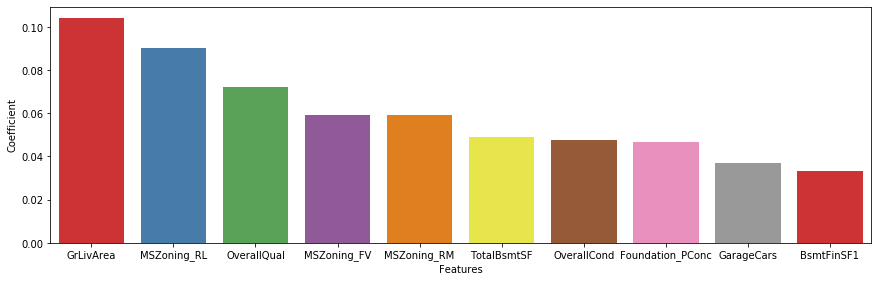

In [76]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(50,20))
plt.subplot(4,3,1)
sns.barplot(x = 'Features', y='Coefficient', palette='Set1', data = temp1_df)
plt.show()

## L1 (Lasso) Regularisation

<b>In sklearn.linear_model.LogisticRegression, C actually refers to the inverse regularization strength, 𝟏/λ 
- Interpretation: 
- C is high, lambda is low, less regularisation. Model is complex and will overfit
- C is low, lambda is high, high regularisation. Model is simple and will underfit</b>

In [77]:
lasso = Lasso()

# list of alphas

C_values = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = C_values, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [78]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.077983,-0.084662,1
5,0.001,-0.078288,-0.084721,2
3,0.0004,-0.077920,-0.084743,3
2,0.0003,-0.077875,-0.084814,4
1,0.0002,-0.077833,-0.084853,5
0,0.0001,-0.077816,-0.084905,6
6,0.002,-0.079058,-0.085372,7
7,0.003,-0.079686,-0.085749,8
8,0.004,-0.080399,-0.086202,9
9,0.005,-0.081154,-0.086684,10


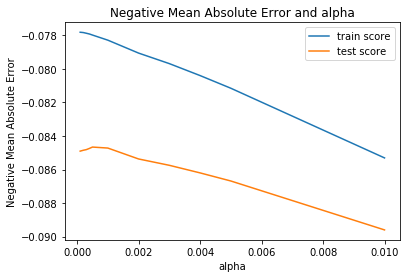

In [79]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [80]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.00782922,  0.01968549,  0.07344589,  0.04735528,  0.03370914,
        0.04787433,  0.10720114,  0.01228606,  0.0091716 ,  0.0173534 ,
        0.02157924,  0.03735714,  0.00955353, -0.01293385, -0.0225262 ,
        0.01552502,  0.01323418,  0.0171345 ,  0.01782532,  0.01485004,
       -0.0120086 ,  0.01288566,  0.07042556,  0.02715101,  0.11146029,
        0.07726235,  0.02463127, -0.01057155, -0.00462157,  0.02328623,
       -0.01291464, -0.01142602,  0.01742272, -0.00883666,  0.01152751,
       -0.00286421,  0.01170557,  0.01122335,  0.01651353, -0.        ,
        0.01095973, -0.00596553, -0.01718606,  0.00497622, -0.01304716,
        0.02048845,  0.04655901,  0.01861857,  0.00691644, -0.00915789])

In [82]:
#calculating RMSE
print('RMSE :', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

RMSE : 0.116024289930373


In [83]:
# Check the mean squared error
mean_squared_error
mean_squared_error(y_test, lasso.predict(X_test))

0.013461635853847253

In [84]:
#X_train, X_test, y_train, y_test
mean_squared_error(y_train, lasso.predict(X_train))

0.011474457227862939

In [85]:
# R-squared value on train dataset.

rsquared_train = r2_score(y_train, lasso.predict(X_train))
rsquared_train

0.918444737695526

In [86]:
# R-squared value on test dataset.
rsquared_test = r2_score(y_test, lasso.predict(X_test))
rsquared_test

0.90323923288977

In [87]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0078
1,LotArea,0.0197
2,OverallQual,0.0734
3,OverallCond,0.0474
4,BsmtFinSF1,0.0337
5,TotalBsmtSF,0.0479
6,GrLivArea,0.1072
7,BsmtFullBath,0.0123
8,FullBath,0.0092
9,HalfBath,0.0174


In [88]:
#Creating dictionary for lasso coefficients 
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.007829215550390192,
 'LotArea': 0.019685492574925342,
 'OverallQual': 0.07344588918744717,
 'OverallCond': 0.047355278594120656,
 'BsmtFinSF1': 0.033709143590664105,
 'TotalBsmtSF': 0.047874330223803406,
 'GrLivArea': 0.10720113721239012,
 'BsmtFullBath': 0.012286064168166421,
 'FullBath': 0.00917160090588006,
 'HalfBath': 0.017353400256116223,
 'Fireplaces': 0.021579244388055984,
 'GarageCars': 0.03735714338006321,
 'WoodDeckSF': 0.009553526336225356,
 'IsRemodelled': -0.012933848128100082,
 'BuiltOrRemodelAge': -0.0225261996903255,
 'OldOrNewGarage': 0.015525023401868676,
 'd_BsmtQual': 0.01323418160722439,
 'd_BsmtExposure': 0.01713449820743516,
 'd_HeatingQC': 0.017825319209699146,
 'd_GarageFinish': 0.014850039492045757,
 'd_BldgType': -0.012008602482758677,
 'd_SaleCondition': 0.012885662089274691,
 'MSZoning_FV': 0.07042555560427396,
 'MSZoning_RH': 0.0271510125584642,
 'MSZoning_RL': 0.11146029474387564,
 'MSZoning_RM': 0.07726235402392345,
 'Neighborhood_Craw

#### RFE

In [89]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [90]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
12,MSZoning_RL,True,1,0.111460
5,GrLivArea,True,1,0.107201
13,MSZoning_RM,True,1,0.077262
1,OverallQual,True,1,0.073446
10,MSZoning_FV,True,1,0.070426
4,TotalBsmtSF,True,1,0.047874
2,OverallCond,True,1,0.047355
14,Foundation_PConc,True,1,0.046559
7,GarageCars,True,1,0.037357
3,BsmtFinSF1,True,1,0.033709


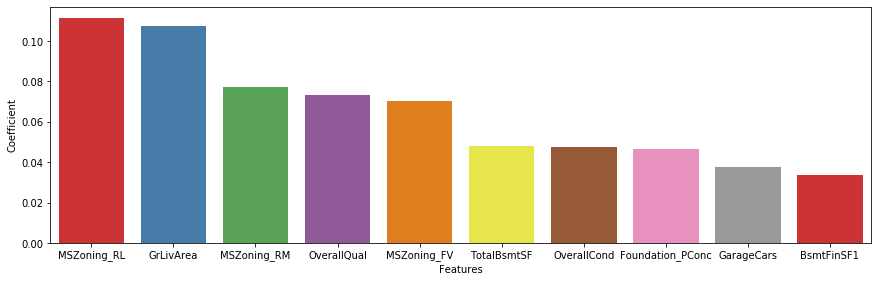

In [91]:
# bar plot to determine the variables that would affect pricing most using lasso regression

plt.figure(figsize=(50,20))
plt.subplot(4,3,1)
sns.barplot(x = 'Features', y='Coefficient', palette='Set1', data = temp2_df)
plt.show()

# Conclusion :

- Below are the top 5 significant features in predicting the price of a house :

     **'MSZoning_RL' , 'GrLivArea	' , 'MSZoning_RM' , ' OverallQual' , ' MSZoning_FV'**
     
    
- The **optimal lambda value** in case of Ridge and Lasso is as below:

   **Ridge** regression - 10

   **Lasso** regression - 0.0004
  
  
- **R2score – train is** : 

     **Lasso** regression : 0.9184

     **Ridge** regression : 0.9181
     

- **R2 score – test	is :**

     **Lasso**  regression : 0.9032

     **Ridge** regression : 0.9011
     

- **Mean squared error train**	: 

    - Lasso : 0.0114	
    
    - Ridge : 0.01151
    
- **Mean squared error test** : 

    - Lasso : 0.01346	
    
    - Ridge : 0.01375


-  Lasso has better R2 score and less Mean error square values compared to Ridge regression. Additionally, lasso helps in Variable Selection .Therefore, Lasso has a better edge over Ridge.


- Hence based on Lasso, the factors that generally affect the price are the Zoning classification( Residential Low Density  ), Above grade (ground) living area square feet,Zoning classification( Residential Medium Density ), Overall quality and Zoning classification( Floating Village Residential )


- BuiltOrRemodelAge is negatively corelated with the sales price of house , which suggest decrease in sales price as BuiltOrRemodelAge increases. So this feature should be kept in consideration while buying the house .


- The high value of the features having positive coefficent contribute to increase in sales price .


- House which fall in Residential Low Density zone are having high sales price .


- **Suggestion for the Surprise Housing** - When the market value of the property is lower than the Predicted Sale Price, its the time to buy and When market values reach the Predicted sale values or higher, its time to flip.
